In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [63]:
df=pd.read_csv("canada_rent.csv")
df.head()

,rentfaster_id,city,province,address,latitude,longitude,lease_term,type,price,beds,baths,sq_feet,link,furnishing,availability_date,smoking,cats,dogs
0,468622,Airdrie,Alberta,69 Gateway Dr NE,51.305962,-114.012515,Long Term,Townhouse,2495.0,2 Beds,2.5,1403,/ab/airdrie/rentals/townhouse/2-bedrooms/pet-f...,Unfurnished,Immediate,Non-Smoking,True,True
1,468622,Airdrie,Alberta,69 Gateway Dr NE,51.305962,-114.012515,Long Term,Townhouse,2695.0,3 Beds,2.5,1496,/ab/airdrie/rentals/townhouse/2-bedrooms/pet-f...,Unfurnished,Immediate,Non-Smoking,True,True
2,468622,Airdrie,Alberta,69 Gateway Dr NE,51.305962,-114.012515,Long Term,Townhouse,2295.0,2 Beds,2.5,1180,/ab/airdrie/rentals/townhouse/2-bedrooms/pet-f...,Unfurnished,Immediate,Non-Smoking,True,True
3,468622,Airdrie,Alberta,69 Gateway Dr NE,51.305962,-114.012515,Long Term,Townhouse,2095.0,2 Beds,2.5,1403,/ab/airdrie/rentals/townhouse/2-bedrooms/pet-f...,Unfurnished,November 18,Non-Smoking,True,True
4,468622,Airdrie,Alberta,69 Gateway Dr NE,51.305962,-114.012515,Long Term,Townhouse,2495.0,2 Beds,2.5,1403,/ab/airdrie/rentals/townhouse/2-bedrooms/pet-f...,Unfurnished,Immediate,Non-Smoking,True,True


In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25771 entries, 0 to 25770
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   rentfaster_id      25771 non-null  int64  
 1   city               25771 non-null  object 
 2   province           25771 non-null  object 
 3   address            25646 non-null  object 
 4   latitude           25771 non-null  float64
 5   longitude          25771 non-null  float64
 6   lease_term         25725 non-null  object 
 7   type               25771 non-null  object 
 8   price              25771 non-null  float64
 9   beds               25639 non-null  object 
 10  baths              25637 non-null  object 
 11  sq_feet            21659 non-null  object 
 12  link               25771 non-null  object 
 13  furnishing         25771 non-null  object 
 14  availability_date  25759 non-null  object 
 15  smoking            23069 non-null  object 
 16  cats               255

In [65]:
df.describe()

,rentfaster_id,latitude,longitude,price
count,25771.000000,25771.000000,25771.000000,25771.000000
mean,471913.795274,48.903370,-100.332196,2151.624142
std,120330.335865,3.603257,17.917001,972.820941
min,820.000000,40.741802,-128.661880,0.000000
25%,415749.000000,45.418785,-114.074660,1600.000000
50%,522379.000000,50.913739,-113.513905,2045.000000
75%,563397.500000,51.093585,-79.401311,2550.000000
max,572635.000000,62.459246,-52.695472,29990.000000


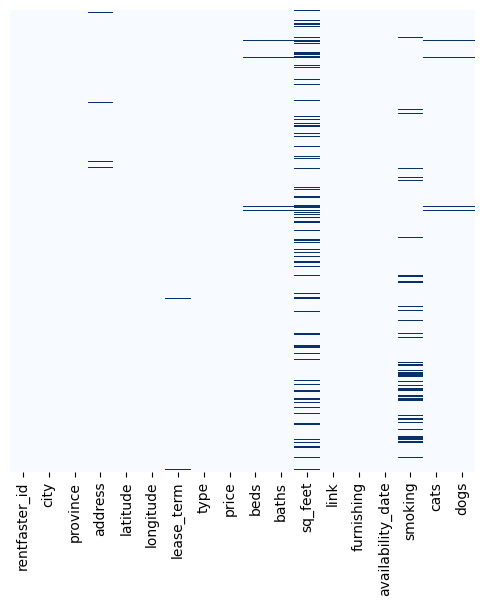

In [66]:
plt.figure(figsize=(6,6))
sns.heatmap(df.isnull(),cbar=False, cmap="Blues",yticklabels=False)
plt.show()

#### Remove irrelevant features

In [67]:
data=df.drop(["rentfaster_id","address","link","availability_date"],axis=1)
data.head(2)

,city,province,latitude,longitude,lease_term,type,price,beds,baths,sq_feet,furnishing,smoking,cats,dogs
0,Airdrie,Alberta,51.305962,-114.012515,Long Term,Townhouse,2495.0,2 Beds,2.5,1403,Unfurnished,Non-Smoking,True,True
1,Airdrie,Alberta,51.305962,-114.012515,Long Term,Townhouse,2695.0,3 Beds,2.5,1496,Unfurnished,Non-Smoking,True,True


#### Drop all the rows with null values.

In [68]:
data=data.dropna()

#### Show unique values for each features

In [69]:
for col in data.columns:
    print(f"{col}, {data[col].nunique()}, {data[col].dtypes},the total null values are {data[col].isnull().sum()}")

city, 232, object,the total null values are 0
province, 10, object,the total null values are 0
latitude, 6806, float64,the total null values are 0
longitude, 6813, float64,the total null values are 0
lease_term, 6, object,the total null values are 0
type, 12, object,the total null values are 0
price, 2221, float64,the total null values are 0
beds, 10, object,the total null values are 0
baths, 16, object,the total null values are 0
sq_feet, 1824, object,the total null values are 0
furnishing, 4, object,the total null values are 0
smoking, 4, object,the total null values are 0
cats, 2, object,the total null values are 0
dogs, 2, object,the total null values are 0


## Data Cleaning

In [70]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19440 entries, 0 to 25770
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   city        19440 non-null  object 
 1   province    19440 non-null  object 
 2   latitude    19440 non-null  float64
 3   longitude   19440 non-null  float64
 4   lease_term  19440 non-null  object 
 5   type        19440 non-null  object 
 6   price       19440 non-null  float64
 7   beds        19440 non-null  object 
 8   baths       19440 non-null  object 
 9   sq_feet     19440 non-null  object 
 10  furnishing  19440 non-null  object 
 11  smoking     19440 non-null  object 
 12  cats        19440 non-null  object 
 13  dogs        19440 non-null  object 
dtypes: float64(3), object(11)
memory usage: 2.2+ MB


#### Convert cats and dogs to numeric values and replace the null values with the mode values.

In [71]:
data["cats"]=data.cats.astype("int")
data["dogs"]=data.dogs.astype("int")

In [72]:
data.type.unique()

array(['Townhouse', 'Apartment', 'Main Floor', 'Basement', 'House',
       'Duplex', 'Room For Rent', 'Condo Unit', 'Loft', 'Acreage',
       'Vacation Home', 'Mobile'], dtype=object)

In [73]:
data.beds.unique()

array(['2 Beds', '3 Beds', 'Studio', '1 Bed', '5 Beds', '4 Beds',
       '6 Beds', '8 Beds', '7 Beds', '9 Beds'], dtype=object)

#### baths: Replace none with 0 and convert to numeric values.

In [74]:
data["baths"]=data.baths.replace("none","0")
data["baths"]=pd.to_numeric(data.baths)
data.baths.unique()

array([2.5, 1. , 2. , 1.5, 3.5, 4. , 3. , 5. , 0. , 4.5, 7.5, 5.5, 6. ,
       6.5, 7. ])

#### sq_feet: Extract the numeric values from the columns

In [75]:
data["sq_feet"]=data.sq_feet.str.extract("(\d+)")
data["sq_feet"]=pd.to_numeric(data["sq_feet"],errors="coerce")
data.sq_feet.isnull().sum()

<>:1: SyntaxWarning: invalid escape sequence '\d'
<>:1: SyntaxWarning: invalid escape sequence '\d'
C:\Users\Kun Bi\AppData\Local\Temp\ipykernel_21432\955609920.py:1: SyntaxWarning: invalid escape sequence '\d'
  data["sq_feet"]=data.sq_feet.str.extract("(\d+)")


np.int64(5)

In [76]:
data.dropna()

,city,province,latitude,longitude,lease_term,type,price,beds,baths,sq_feet,furnishing,smoking,cats,dogs
0,Airdrie,Alberta,51.305962,-114.012515,Long Term,Townhouse,2495.0,2 Beds,2.5,1403.0,Unfurnished,Non-Smoking,1,1
1,Airdrie,Alberta,51.305962,-114.012515,Long Term,Townhouse,2695.0,3 Beds,2.5,1496.0,Unfurnished,Non-Smoking,1,1
2,Airdrie,Alberta,51.305962,-114.012515,Long Term,Townhouse,2295.0,2 Beds,2.5,1180.0,Unfurnished,Non-Smoking,1,1
3,Airdrie,Alberta,51.305962,-114.012515,Long Term,Townhouse,2095.0,2 Beds,2.5,1403.0,Unfurnished,Non-Smoking,1,1
4,Airdrie,Alberta,51.305962,-114.012515,Long Term,Townhouse,2495.0,2 Beds,2.5,1403.0,Unfurnished,Non-Smoking,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25766,Yorkton,Saskatchewan,51.203024,-102.484782,Long Term,Apartment,920.0,Studio,1.0,400.0,Unfurnished,Non-Smoking,1,1
25767,Yorkton,Saskatchewan,51.203024,-102.484782,Long Term,Apartment,1450.0,3 Beds,1.0,810.0,Unfurnished,Non-Smoking,1,1
25768,Yorkton,Saskatchewan,51.202667,-102.485765,Long Term,Apartment,1125.0,1 Bed,1.0,520.0,Unfurnished,Non-Smoking,1,1
25769,Yorkton,Saskatchewan,51.202667,-102.485765,Long Term,Apartment,920.0,Studio,1.0,400.0,Unfurnished,Non-Smoking,1,1


In [77]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19440 entries, 0 to 25770
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   city        19440 non-null  object 
 1   province    19440 non-null  object 
 2   latitude    19440 non-null  float64
 3   longitude   19440 non-null  float64
 4   lease_term  19440 non-null  object 
 5   type        19440 non-null  object 
 6   price       19440 non-null  float64
 7   beds        19440 non-null  object 
 8   baths       19440 non-null  float64
 9   sq_feet     19435 non-null  float64
 10  furnishing  19440 non-null  object 
 11  smoking     19440 non-null  object 
 12  cats        19440 non-null  int64  
 13  dogs        19440 non-null  int64  
dtypes: float64(5), int64(2), object(7)
memory usage: 2.2+ MB


In [78]:
data.isnull().sum()

city          0
province      0
latitude      0
longitude     0
lease_term    0
type          0
price         0
beds          0
baths         0
sq_feet       5
furnishing    0
smoking       0
cats          0
dogs          0
dtype: int64

In [79]:
data.dropna(inplace=True)
data.isnull().sum()

city          0
province      0
latitude      0
longitude     0
lease_term    0
type          0
price         0
beds          0
baths         0
sq_feet       0
furnishing    0
smoking       0
cats          0
dogs          0
dtype: int64

<Axes: >

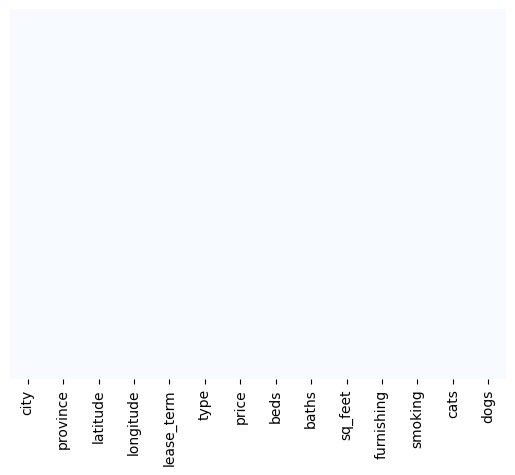

In [80]:
sns.heatmap(data=data.isnull(),yticklabels=False,cmap="Blues",cbar=None)

#### Check on unique_values

In [81]:
for col in data.columns:
    print(f"{col}, {data[col].unique()}")

city, ['Airdrie' 'Aldersyde' 'Balzac' 'Beaumont' 'Beiseker' 'Blackfalds'
 'Bonnyville' 'Brooks' 'Bruderheim' 'Calgary' 'Camrose' 'Canmore'
 'Carmangay' 'Chestermere' 'Cochrane' 'Cold Lake' 'Crowsnest Pass'
 'De Winton' 'Drumheller' 'Edmonton' 'Edson' 'Fort McMurray'
 'Fort Saskatchewan' 'Grande Prairie' 'High River' 'Leduc' 'Lethbridge'
 'Medicine Hat' 'Morinville' 'Nisku' 'Okotoks' 'Olds' 'Peace River'
 'Ponoka' 'Priddis' 'Red Deer' 'Rocky View' 'Shaughnessy' 'Sherwood Park'
 'Slave Lake' 'Spruce Grove' 'St. Albert' 'St. Paul' 'Stony Plain'
 'Strathmore' 'Sundre' 'Sylvan Lake' 'Wainwright' 'Westerose' 'Westlock'
 'Wetaskiwin' 'Whitecourt' 'Abbotsford' 'Burnaby' 'Campbell River'
 'Chilliwack' 'Colwood' 'Coquitlam' 'Courtenay' 'Dawson Creek' 'Duncan'
 'Eagle Bay' 'Fort Nelson' 'Fort St John' 'Golden' 'Invermere' 'Kamloops'
 'Kelowna' 'Kitimat' 'Ladysmith' 'Lake Country' 'Langford' 'Langley'
 'Maple Ridge' 'Mission' 'Nanaimo' 'New Westminster' 'North Cowichan'
 'Parksville' 'Penticton' '

In [82]:
data.describe()

,latitude,longitude,price,baths,sq_feet,cats,dogs
count,19435.000000,19435.000000,19435.000000,19435.000000,19435.000000,19435.000000,19435.000000
mean,49.172637,-101.732325,2166.795040,1.437304,898.659017,0.673116,0.638487
std,3.527990,17.457827,895.476696,0.668614,503.721730,0.469087,0.480451
min,42.040814,-128.661880,0.000000,0.000000,0.000000,0.000000,0.000000
25%,45.468491,-114.078624,1650.000000,1.000000,612.000000,0.000000,0.000000
50%,50.972543,-113.534622,2069.000000,1.000000,814.000000,1.000000,1.000000
75%,51.108143,-79.594695,2550.000000,2.000000,1050.000000,1.000000,1.000000
max,62.459246,-52.695472,26500.000000,7.500000,11700.000000,1.000000,1.000000


#### There are 0 price and 0 sq feet properties. It makes no sense. Drop those properties.

In [83]:
data=data.query("price!=0")

In [84]:
data=data.query("sq_feet!=0")

In [85]:
data.describe()

,latitude,longitude,price,baths,sq_feet,cats,dogs
count,18786.000000,18786.000000,18786.000000,18786.000000,18786.000000,18786.000000,18786.000000
mean,49.137522,-101.800902,2203.149665,1.449297,928.830778,0.669169,0.633876
std,3.468041,17.506623,876.987143,0.674193,484.309220,0.470525,0.481757
min,42.040814,-128.661880,1.000000,0.000000,1.000000,0.000000,0.000000
25%,45.468491,-114.079437,1692.000000,1.000000,629.250000,0.000000,0.000000
50%,50.974650,-113.577293,2099.000000,1.000000,830.000000,1.000000,1.000000
75%,51.098375,-79.605174,2571.502500,2.000000,1061.000000,1.000000,1.000000
max,56.767224,-52.695472,26500.000000,7.500000,11700.000000,1.000000,1.000000


In [86]:
print(data.shape)
print(df.shape)

(18786, 14)
(25771, 18)


In [87]:
print(f"Total rows dropped are {df.shape[0]-data.shape[0]}.")

Total rows dropped are 6985.


#### EDA and Visualization

In [88]:
num=data.select_dtypes("number").columns
cat=data.select_dtypes("object").columns

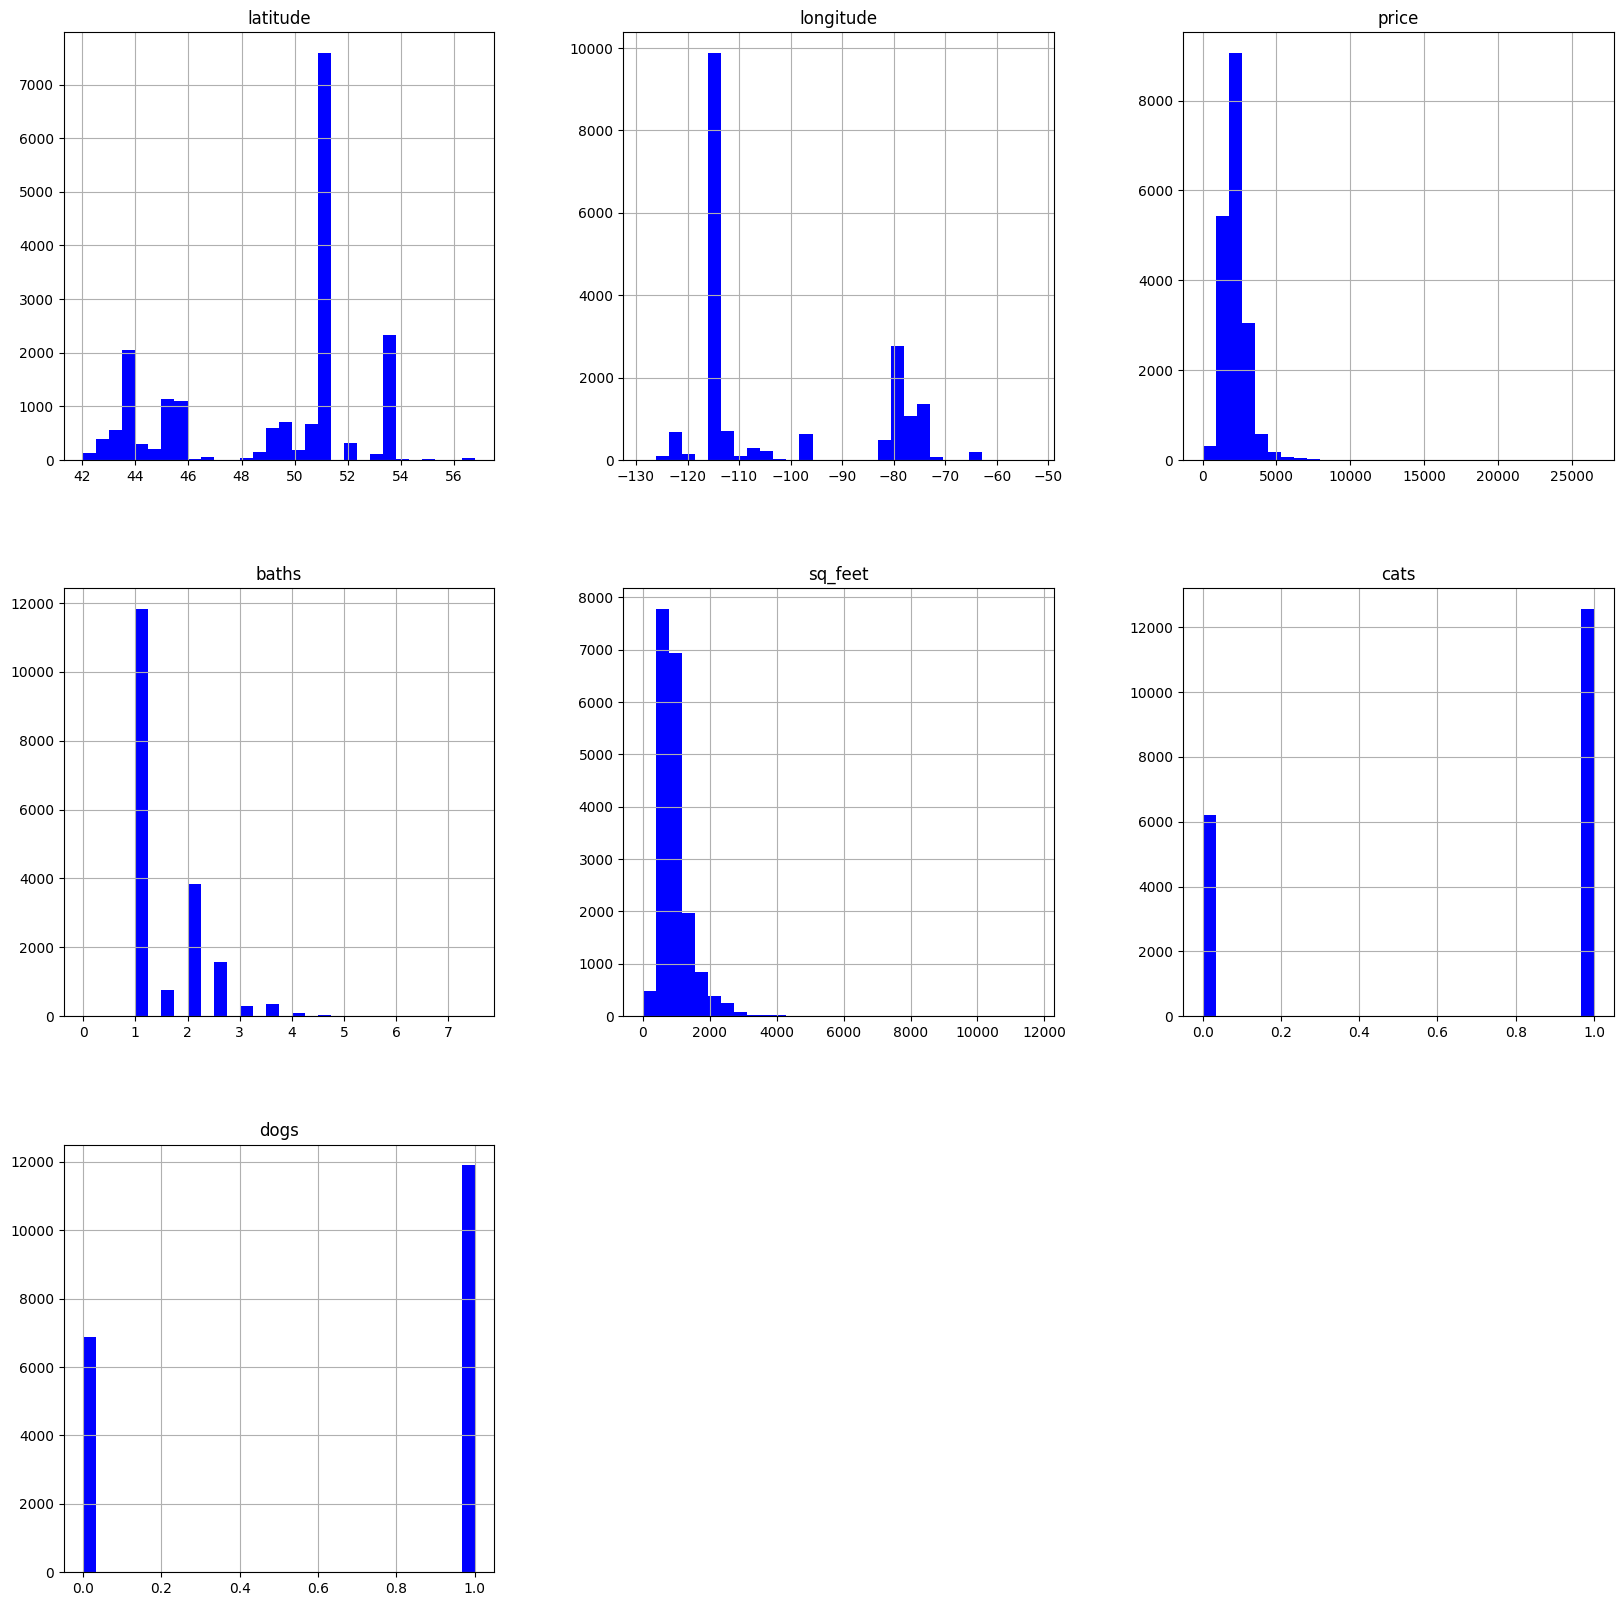

In [89]:
data.hist(bins=30,figsize=(20,20),color="b")
plt.show()

**Observation**
* Most of the rent per month are under 5000 dollars.
* Most of appartments have 1 and 2 bathroom.
* Most of appartment are under 2000 feet.
* Most of appartment allow cats and dogs.

#### Check whete the expensive and large appartments are located.

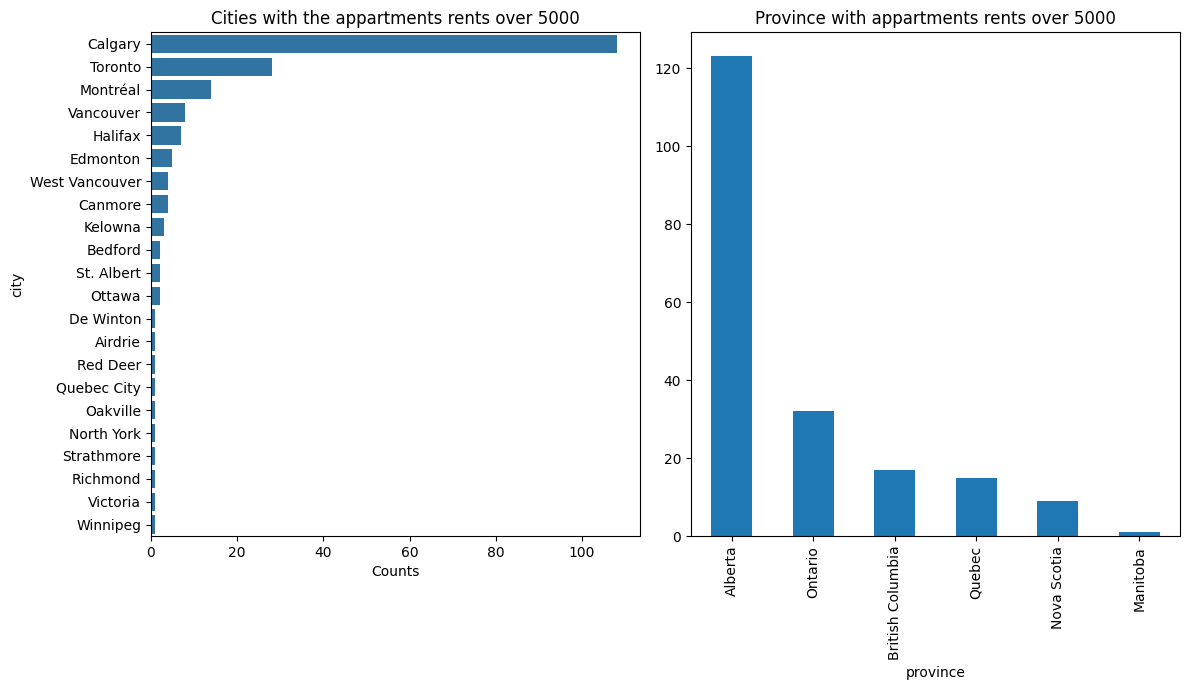

In [90]:
expensive_apps=data.query("price>5000")
plt.figure(figsize=(12,7))
plt.subplot(121)
c=expensive_apps.groupby("city").size().reset_index()
c.columns=["city","Counts"]
c=c.sort_values("Counts",ascending=False)
sns.barplot(data=c,y="city",x="Counts")
plt.title("Cities with the appartments rents over 5000")
plt.subplot(122)
expensive_apps=data.query("price>5000")
expensive_apps.province.value_counts().plot.bar()
plt.title("Province with appartments rents over 5000")
plt.tight_layout()
plt.show()

**Observation**
* Calgary, Toronto, Montreal, Vancouver has the most expensive appartments.
* Alberta is the province with the most expensive appartments.

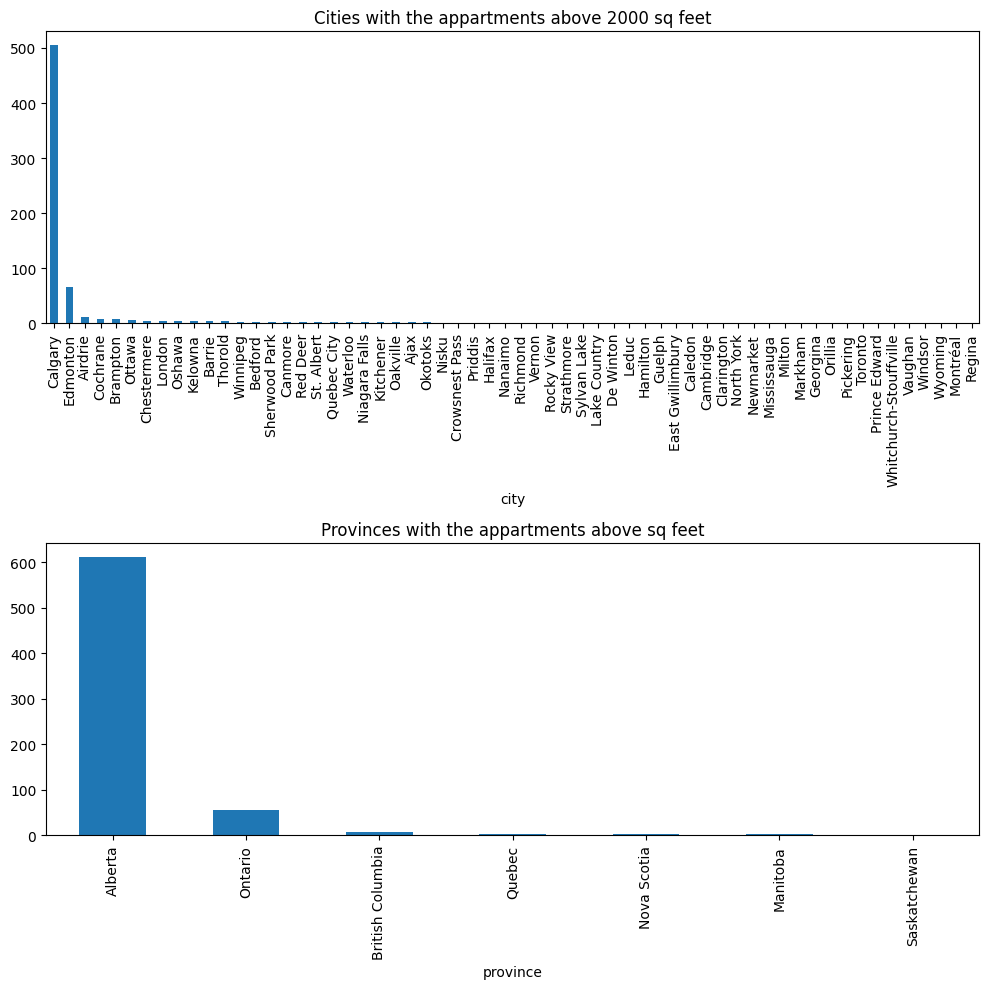

In [91]:
feet=data.query("sq_feet>2000")
plt.figure(figsize=(10,10))
plt.subplot(211)
feet.city.value_counts().plot.bar()
plt.title("Cities with the appartments above 2000 sq feet")
plt.subplot(212)
feet.province.value_counts().plot.bar()
plt.title("Provinces with the appartments above sq feet")
plt.tight_layout()
plt.show()

**Observation**
* Calgary and Edmonton have the largest appartments.
* Alberta, ontario, and Quebec has the largest houeing.

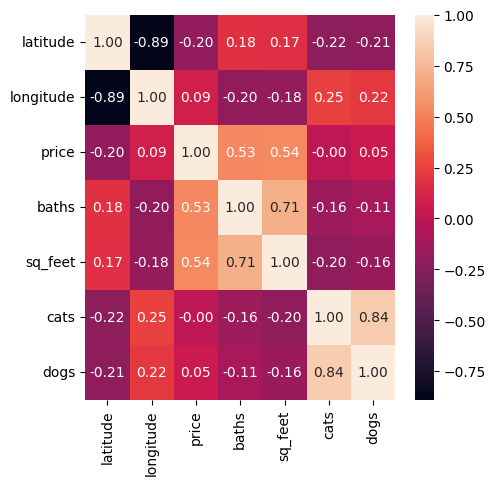

In [92]:
f,ax=plt.subplots(figsize=(5,5))
sns.heatmap(data[num].corr(),annot=True,fmt="0.2f")
plt.show()

**Observation**
* The larger the square feet, and the more the bathrooms, the more expensive the housing is.
* The more bathrooms it has, the more square feet the house has.
* Both cats and dogs are welcome for the appartments allowing pets.
* The lower the longitude, or the more southern the property is located, the more expensive the property is.

## Category Count

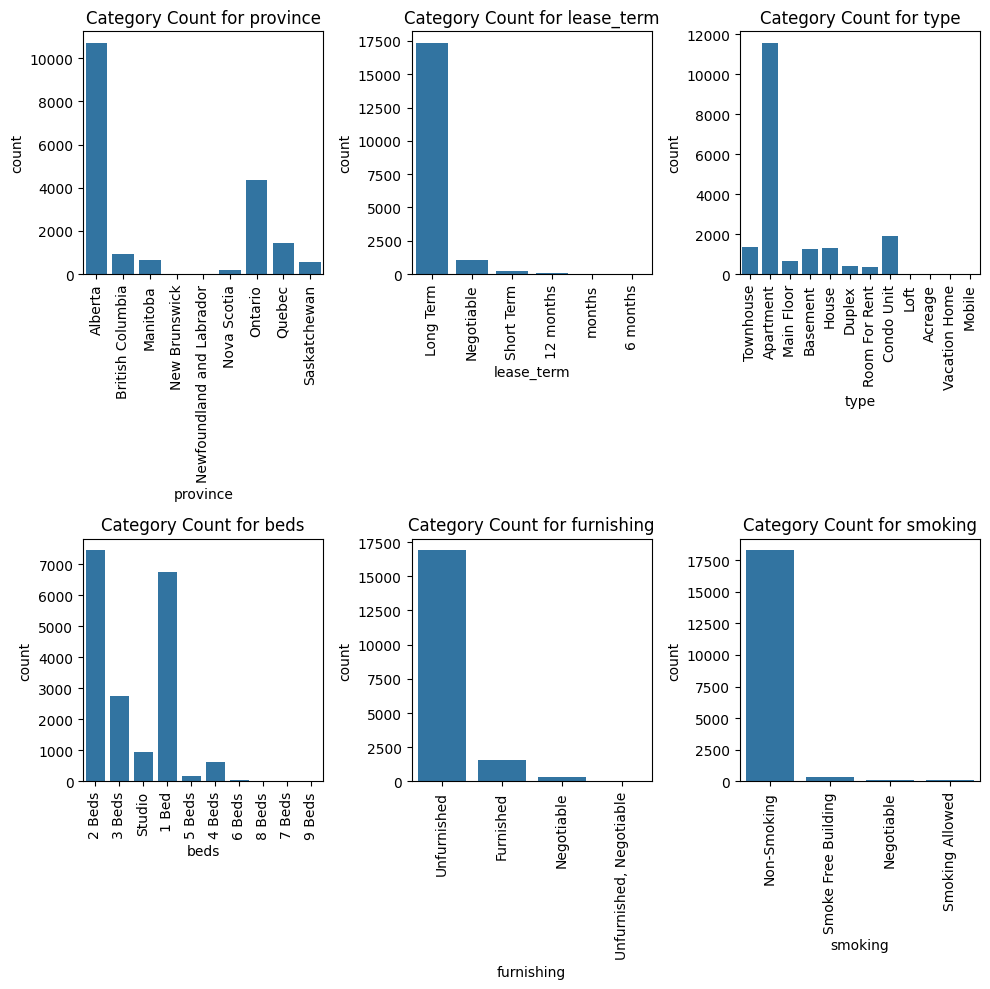

In [93]:
plt.figure(figsize=(10,10))
for num, col in enumerate(data[cat].drop("city",axis=1),1):
    plt.subplot(2,3,num)
    sns.countplot(data=data,x=col)
    plt.title(f"Category Count for {col}")
    plt.xticks(rotation=90)
plt.tight_layout()    
plt.show()

**Observation**
* Alberta, Ontario, Quebec have the most amount of properties for rent.
* Most of the leases are for long term.
* Most of the properties for rent are appartments, townhouses, house, condos, and individual rooms for rent.
* Most of the bedrooms are 1, 2, 3, 4 and studios.
* Most of the properties have no furnitures.
* Most of the properties allows no smokings.

Text(0.5, 1.0, 'Top 10 Cities for Rents')

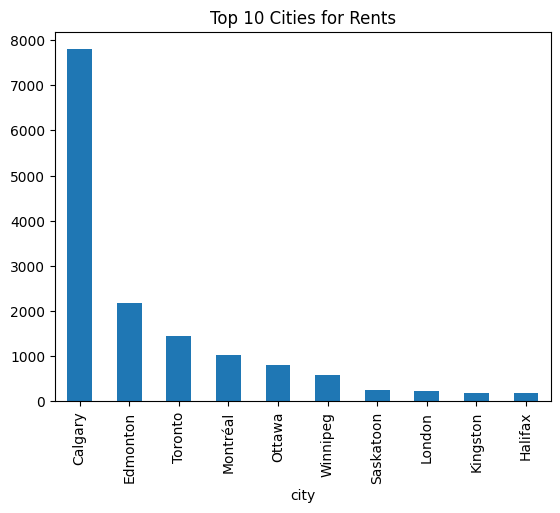

In [94]:
data.city.value_counts().iloc[:10].plot.bar()
plt.title("Top 10 Cities for Rents")

**Observations**
* The Top 10 cities counts for 79% of the total rents in the datasets.

#### Price per Category

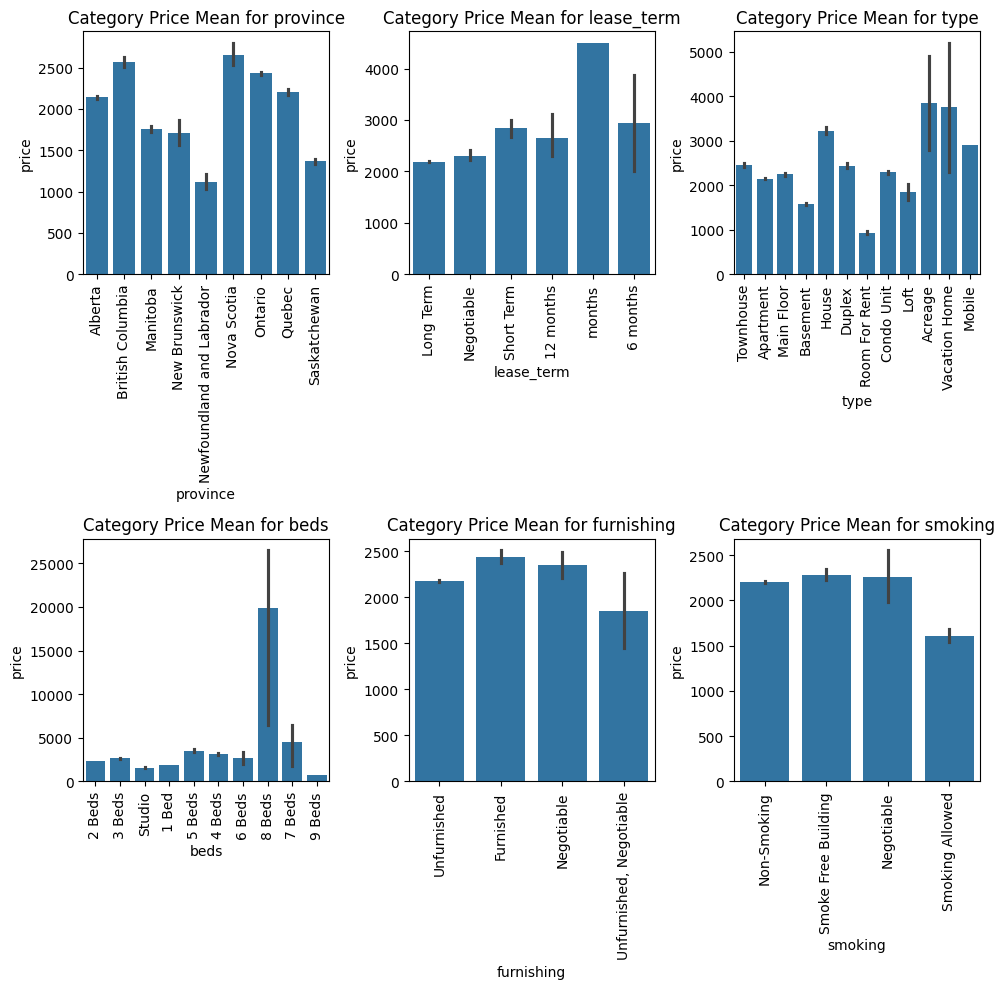

In [96]:
plt.figure(figsize=(10,10))
for num, col in enumerate(data[cat].drop("city",axis=1),1):
    plt.subplot(2,3,num)
    sns.barplot(data=data,x=col,y="price",estimator="mean")
    plt.title(f"Category Price Mean for {col}")
    plt.xticks(rotation=90)
plt.tight_layout()    
plt.show()

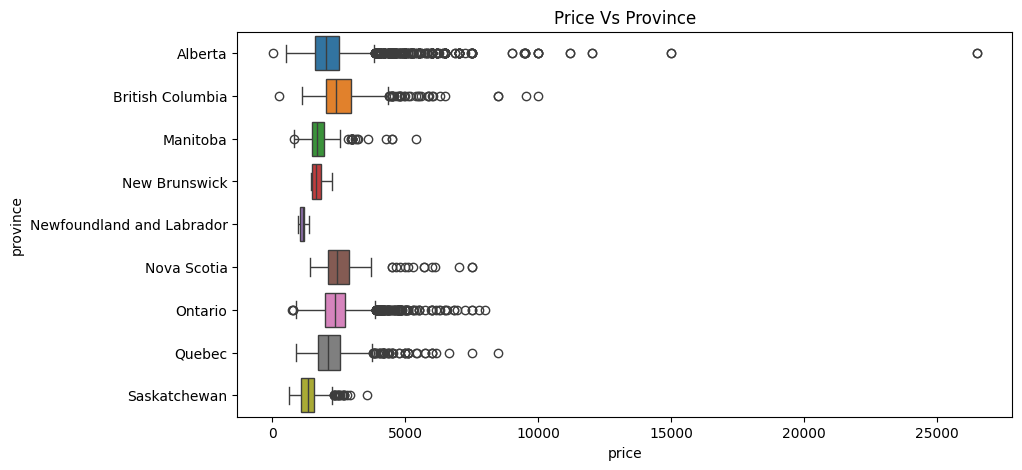

In [35]:
plt.figure(figsize=(10,5))
sns.boxplot(data=data, y="province",x="price",hue="province")
plt.title("Price Vs Province")
plt.show()

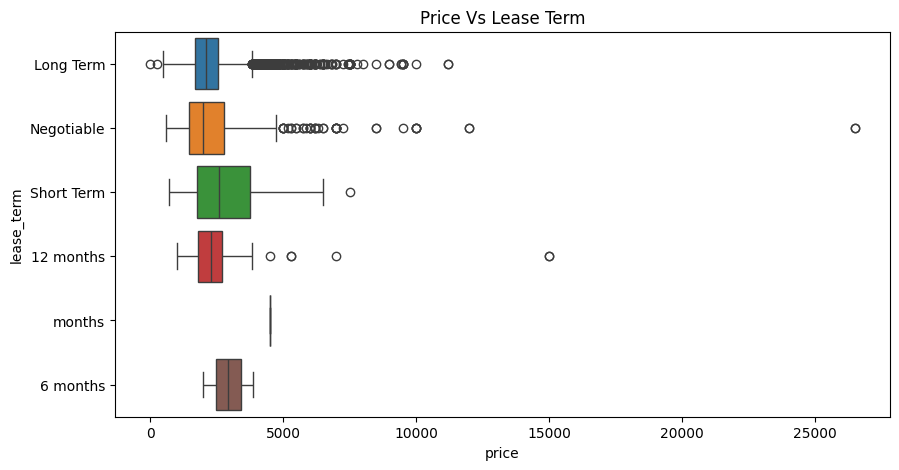

In [36]:
plt.figure(figsize=(10,5))
sns.boxplot(data=data, y="lease_term",x="price",hue="lease_term")
plt.title("Price Vs Lease Term")
plt.show()

**Observation**
* Ontario, Alberta, Nova Scotia, BC, Quebec have the most expensive housings.
* Saskkatchewan, Northwest Territory, Manitoba, Newfoundland and Labrador have low pring housings.
* The shorter term the lease, the more expensive it is.

#### Feature Engineering

In [37]:
X=data.drop(["city","price"],axis=1)
y=data.price

In [38]:
cat=X.select_dtypes("object").columns
numX=X.select_dtypes("number").columns

In [39]:
X_dummies=pd.get_dummies(X[cat],drop_first=True).astype("int")
X_dummies

,province_British Columbia,province_Manitoba,province_New Brunswick,province_Newfoundland and Labrador,province_Nova Scotia,province_Ontario,province_Quebec,province_Saskatchewan,lease_term_6 months,lease_term_Long Term,...,beds_7 Beds,beds_8 Beds,beds_9 Beds,beds_Studio,furnishing_Negotiable,furnishing_Unfurnished,"furnishing_Unfurnished, Negotiable",smoking_Non-Smoking,smoking_Smoke Free Building,smoking_Smoking Allowed
0,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,1,0,1,0,0
1,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,1,0,1,0,0
2,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,1,0,1,0,0
3,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,1,0,1,0,0
4,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25766,0,0,0,0,0,0,0,1,0,1,...,0,0,0,1,0,1,0,1,0,0
25767,0,0,0,0,0,0,0,1,0,1,...,0,0,0,0,0,1,0,1,0,0
25768,0,0,0,0,0,0,0,1,0,1,...,0,0,0,0,0,1,0,1,0,0
25769,0,0,0,0,0,0,0,1,0,1,...,0,0,0,1,0,1,0,1,0,0


In [40]:
dataX=pd.concat([X_dummies,X[numX]],axis=1)
dataX.head()

,province_British Columbia,province_Manitoba,province_New Brunswick,province_Newfoundland and Labrador,province_Nova Scotia,province_Ontario,province_Quebec,province_Saskatchewan,lease_term_6 months,lease_term_Long Term,...,"furnishing_Unfurnished, Negotiable",smoking_Non-Smoking,smoking_Smoke Free Building,smoking_Smoking Allowed,latitude,longitude,baths,sq_feet,cats,dogs
0,0,0,0,0,0,0,0,0,0,1,...,0,1,0,0,51.305962,-114.012515,2.5,1403.0,1,1
1,0,0,0,0,0,0,0,0,0,1,...,0,1,0,0,51.305962,-114.012515,2.5,1496.0,1,1
2,0,0,0,0,0,0,0,0,0,1,...,0,1,0,0,51.305962,-114.012515,2.5,1180.0,1,1
3,0,0,0,0,0,0,0,0,0,1,...,0,1,0,0,51.305962,-114.012515,2.5,1403.0,1,1
4,0,0,0,0,0,0,0,0,0,1,...,0,1,0,0,51.305962,-114.012515,2.5,1403.0,1,1


In [41]:
dataX.isnull().sum()

province_British Columbia             0
province_Manitoba                     0
province_New Brunswick                0
province_Newfoundland and Labrador    0
province_Nova Scotia                  0
province_Ontario                      0
province_Quebec                       0
province_Saskatchewan                 0
lease_term_6 months                   0
lease_term_Long Term                  0
lease_term_Negotiable                 0
lease_term_Short Term                 0
lease_term_months                     0
type_Apartment                        0
type_Basement                         0
type_Condo Unit                       0
type_Duplex                           0
type_House                            0
type_Loft                             0
type_Main Floor                       0
type_Mobile                           0
type_Room For Rent                    0
type_Townhouse                        0
type_Vacation Home                    0
beds_2 Beds                           0


In [42]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(dataX,y,random_state=42,test_size=0.2)

In [43]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

#### Lasso

In [44]:
from sklearn.linear_model import LassoCV
lasso=LassoCV(alphas=10**np.linspace(-3,3,200),cv=5)
lasso.fit(X_train_scaled,y_train)

C:\Users\Kun Bi\anaconda3\envs\Data_Science\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:683: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2669732.4112353325, tolerance: 974444.6565900744
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\Kun Bi\anaconda3\envs\Data_Science\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:683: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5227160.658639908, tolerance: 974444.6565900744
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\Kun Bi\anaconda3\envs\Data_Science\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:683: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6633679.901927471, tolerance: 974444.6565900744
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\Kun Bi\anaconda3\envs\Data_

LassoCV(alphas=array([1.00000000e-03, 1.07189132e-03, 1.14895100e-03, 1.23155060e-03,
       1.32008840e-03, 1.41499130e-03, 1.51671689e-03, 1.62575567e-03,
       1.74263339e-03, 1.86791360e-03, 2.00220037e-03, 2.14614120e-03,
       2.30043012e-03, 2.46581108e-03, 2.64308149e-03, 2.83309610e-03,
       3.03677112e-03, 3.25508860e-03, 3.48910121e-03, 3.73993730e-03,
       4.00880633e-03, 4.29700470e-0...
       2.02550194e+02, 2.17111795e+02, 2.32720248e+02, 2.49450814e+02,
       2.67384162e+02, 2.86606762e+02, 3.07211300e+02, 3.29297126e+02,
       3.52970730e+02, 3.78346262e+02, 4.05546074e+02, 4.34701316e+02,
       4.65952567e+02, 4.99450512e+02, 5.35356668e+02, 5.73844165e+02,
       6.15098579e+02, 6.59318827e+02, 7.06718127e+02, 7.57525026e+02,
       8.11984499e+02, 8.70359136e+02, 9.32930403e+02, 1.00000000e+03]),
        cv=5)

In [45]:
lasso.alpha_

np.float64(0.001)

In [46]:
def linear_evaluate(X_train,X_test,y_train,y_test, model):
    k_train=X_train.shape[1]
    n_train=X_train.shape[0]
    k_test=X_test.shape[1]
    n_test=X_test.shape[0]
    
    y_train_pred=model.predict(X_train)
    y_test_pred=model.predict(X_test)
    from sklearn.metrics import mean_absolute_error as MAE, mean_squared_error as MSE, r2_score as r2, root_mean_squared_error as RMSE
    r2_train=r2(y_train,y_train_pred)
    r2_test=r2(y_test,y_test_pred)
    rmse=RMSE(y_test,y_test_pred)
    mse=MSE(y_test,y_test_pred)
    mae=MAE(y_test,y_test_pred)
    adjusted_r2_train=1-(1-r2_train)*(n_train-1)/(n_train-k_train-1)
    adjusted_r2_test=1-(1-r2_test)*(n_test-1)/(n_test-k_test-1)
    print(f"The training r2 Score is {r2_train}, and the testing r2 Score is {r2_test}.")
    print(f"The training adjusted r2 Score is {adjusted_r2_train}, and the testing adjusted r2 Score is {adjusted_r2_test}.")
    print(f"The testing Mean Squared Error is {mse}, and The testing Root Mean Squared Error is {rmse}, and the testing Mean Absolute Error is {mae}. ")

In [47]:
linear_evaluate(X_train_scaled,X_test_scaled,y_train,y_test,lasso)

The training r2 Score is 0.6172005235503699, and the testing r2 Score is 0.5977763224151358.
The training adjusted r2 Score is 0.6160507453872253, and the testing adjusted r2 Score is 0.5929002271857934.
The testing Mean Squared Error is 282014.42278708867, and The testing Root Mean Squared Error is 531.0503015601146, and the testing Mean Absolute Error is 353.1689088888866. 


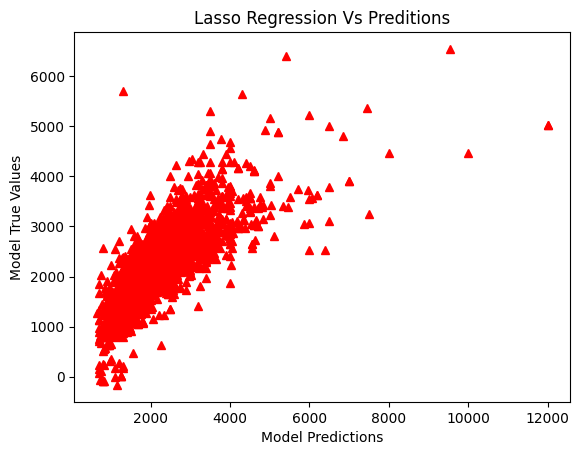

In [97]:
y_test_pred=lasso.predict(X_test_scaled)
plt.plot(y_test,y_test_pred,"^",color="r")
plt.xlabel("Model Predictions")
plt.ylabel("Model True Values")
plt.title("Lasso Regression Vs Preditions")
plt.show()

#### Ridge Regression

In [49]:
from sklearn.linear_model import RidgeCV
alphas=[0.001,0.01,0.1,1,10,100]
ridge=RidgeCV(alphas=alphas,cv=5)
ridge.fit(X_train_scaled,y_train)

RidgeCV(alphas=[0.001, 0.01, 0.1, 1, 10, 100], cv=5)

In [50]:
ridge.alpha_

np.float64(0.001)

In [51]:
linear_evaluate(X_train_scaled,X_test_scaled,y_train,y_test,ridge)

The training r2 Score is 0.6172567571261931, and the testing r2 Score is 0.5975380393038309.
The training adjusted r2 Score is 0.6161071478664599, and the testing adjusted r2 Score is 0.5926590554053051.
The testing Mean Squared Error is 282181.4922010477, and The testing Root Mean Squared Error is 531.207579201434, and the testing Mean Absolute Error is 353.3565596714051. 


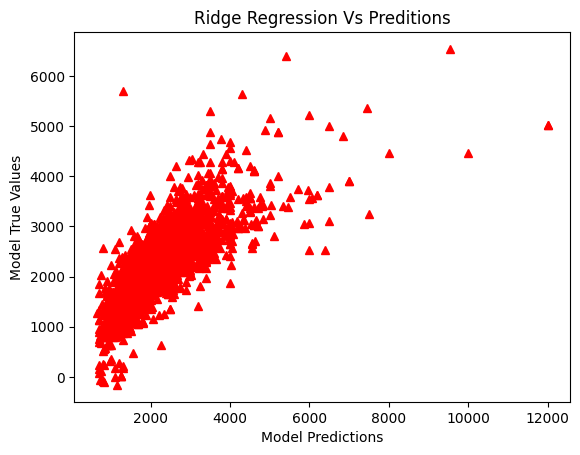

In [98]:
y_test_pred=ridge.predict(X_test_scaled)
plt.plot(y_test,y_test_pred,"^",color="r")
plt.xlabel("Model Predictions")
plt.ylabel("Model True Values")
plt.title("Ridge Regression Vs Preditions")
plt.show()

#### Deep Learning

In [53]:
input_n=X_train_scaled.shape[1]
input_n

45

In [54]:
import tensorflow.keras
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
from keras.optimizers import Adam
model=Sequential()
model.add(Dense(100,input_dim=input_n,activation="relu"))
model.add(Dropout(0.2))
model.add(Dense(100,activation="relu"))
model.add(Dense(100,activation="relu"))
model.add(Dense(1,activation="linear"))

C:\Users\Kun Bi\anaconda3\envs\Data_Science\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [55]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 100)            │         4,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │           101 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 24,901 (97.27 KB)

 Trainable params: 24,901 (97.27 KB)

 Non-trainable params: 0 (0.00 B)

In [56]:
model.compile(optimizer="Adam",loss="mean_squared_error")
epoch_hist=model.fit(X_train_scaled,y_train,epochs=100,batch_size=50,verbose=1,validation_split=0.2)

Epoch 1/100
241/241 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 4010010.5000 - val_loss: 567636.1250
Epoch 2/100
241/241 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 383760.0938 - val_loss: 470139.9688
Epoch 3/100
241/241 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 321243.0938 - val_loss: 437641.9688
Epoch 4/100
241/241 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 475936.6562 - val_loss: 387510.8750
Epoch 5/100
241/241 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 333117.0312 - val_loss: 363181.3438
Epoch 6/100
241/241 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 323713.6562 - val_loss: 342602.7188
Epoch 7/100
241/241 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 309112.7812 - val_loss: 329106.0625
Epoch 8/100
241/241 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 296566.2188 - val_loss: 306140.0938
Epoch 9/100
241/241 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 287180.9375 - val_loss: 305538.3750
Epoch 10/100
241/241 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 282578.5938 - val_loss: 285336.0312
Epoch 11/100
241/241 ━━━━━━━

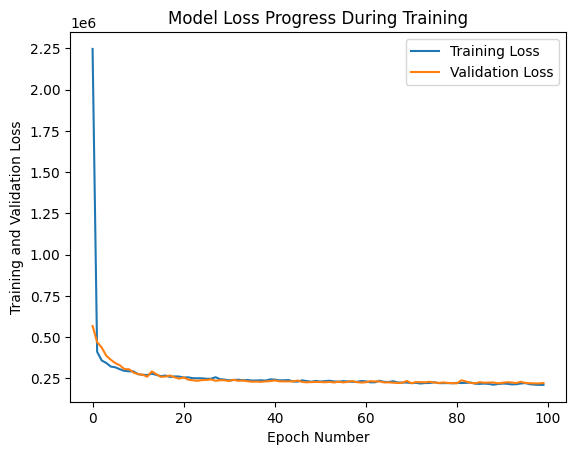

In [57]:
plt.plot(epoch_hist.history["loss"])
plt.plot(epoch_hist.history["val_loss"])
plt.title("Model Loss Progress During Training")
plt.xlabel("Epoch Number")
plt.ylabel("Training and Validation Loss")
plt.legend(["Training Loss","Validation Loss"])

118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


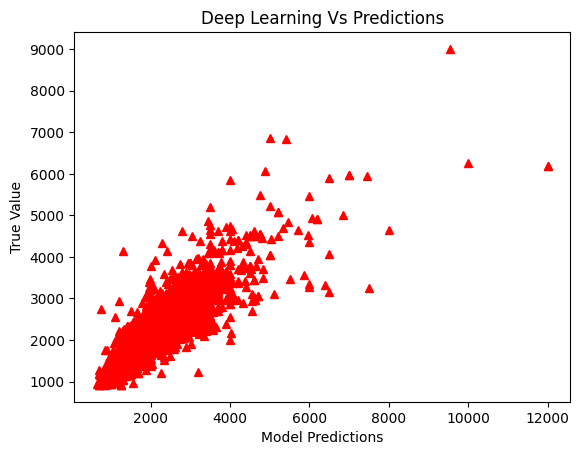

In [99]:
y_predict = model.predict(X_test_scaled)
plt.plot(y_test, y_predict, "^", color = 'r')
plt.xlabel("Model Predictions")
plt.ylabel("True Value")
plt.title('Deep Learning Vs Predictions')
plt.show()

In [59]:
linear_evaluate(X_train_scaled,X_test_scaled,y_train,y_test,model)

470/470 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
The training r2 Score is 0.7479177582842351, and the testing r2 Score is 0.7039123035331444.
The training adjusted r2 Score is 0.747160602972714, and the testing adjusted r2 Score is 0.7003228783335191.
The testing Mean Squared Error is 207598.42213873973, and The testing Root Mean Squared Error is 455.6296984819358, and the testing Mean Absolute Error is 306.55365924894073. 
